In [1]:
anno_names_list = []

location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/unTrimmed/3.For_tree"
gene_anno_dic = {}
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/20.RERconverge/2.Modified_diapause/correlation_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0]
        # print(gene_name)
        anno_name = lines.split(",")[-1].replace('"', '')
        if len(anno_name) < 2:
            # print(gene_name,anno_name)
            anno_name = gene_name
        
        gene_anno_dic[gene_name]= anno_name.strip()




with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/63.BUSCO_annotation/busco_names.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        lines_split = lines.strip().split(",")
        # print(lines_split)
        gene_name = lines_split[0]
        anno_name = lines_split[1]
       
            
        if gene_name not in gene_anno_dic:
            
            gene_anno_dic[gene_name]= anno_name
            # print(gene_name)
            continue
        if gene_anno_dic[gene_name] == gene_name:
            gene_anno_dic[gene_name]= anno_name
  

In [42]:
import pandas as pd

# location = 
rercoverge_file = pd.read_csv("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/1.Rerconverge_result/correlation_annotated_busco_category.csv")

positive_df = rercoverge_file[rercoverge_file["category"] == "Significant_Positive"]
# positive_df = rercoverge_file[rercoverge_file["category"] == "Significant_Negative"]
positive_df["Name"] = positive_df["Name"].str.replace(".fas.best.fas.ClipKIT",'')
positive_gene_list = (positive_df["Name"].to_list())

/tmp/ipykernel_6749/3947256465.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df["Name"] = positive_df["Name"].str.replace(".fas.best.fas.ClipKIT",'')


In [45]:
positive_gene_list[positive_gene_list.index("period")] = "2905at7088"
print(len(positive_gene_list))

25


In [46]:
from goatools.obo_parser import GODag

# Load GO DAG
obo_file = "/mnt/g/My Drive/Circadian Rhythm Genes Project/22.Busco_related/1.Annotation/go.obo"  # Download from http://purl.obolibrary.org/obo/go/go-basic.obo
go_dag = GODag(obo_file)


/mnt/g/My Drive/Circadian Rhythm Genes Project/22.Busco_related/1.Annotation/go.obo: fmt(1.2) rel(2025-06-01) 43,448 Terms


In [47]:
gene_dict = {}
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/22.Busco_related/1.Annotation/MM_xnpmgii0.emapper.annotations.tsv", 'r') as anno_file:
    for anno_line in anno_file:
        if anno_line[0] != "#":
            anno_split = anno_line.strip().split("\t")
            if anno_split[0] in positive_gene_list:
                gene_dict[anno_split[0]] = anno_split[9].split(",")
                # print(anno_line)
# print(gene_dict)

# Filter to only BP terms
def is_biological_process(go_id):
    # print(go_id)
    term = go_dag.get(go_id)
    # print(term)
    return term is not None and term.namespace == 'biological_process'

filtered_go_dict = {}
for gene, go_list in gene_dict.items():
    # print(gene, go_list)
    # for go in go_list:
    #     print(go)
    
    # go_list_split = go_list[0].split(",")
    # print(go_list_split)
    # assert False
    filtered = [go for go in go_list if is_biological_process(go)]
    filtered_go_dict[gene] = set(filtered)

filtered_go_dict


{'10001at7088': {'GO:0000302',
  'GO:0006139',
  'GO:0006220',
  'GO:0006244',
  'GO:0006259',
  'GO:0006281',
  'GO:0006284',
  'GO:0006285',
  'GO:0006289',
  'GO:0006304',
  'GO:0006753',
  'GO:0006793',
  'GO:0006796',
  'GO:0006950',
  'GO:0006974',
  'GO:0006979',
  'GO:0008150',
  'GO:0008152',
  'GO:0009056',
  'GO:0009058',
  'GO:0009117',
  'GO:0009166',
  'GO:0009219',
  'GO:0009223',
  'GO:0009262',
  'GO:0009264',
  'GO:0009394',
  'GO:0009636',
  'GO:0009987',
  'GO:0019637',
  'GO:0019692',
  'GO:0033554',
  'GO:0034404',
  'GO:0034599',
  'GO:0034614',
  'GO:0034654',
  'GO:0034655',
  'GO:0035690',
  'GO:0042221',
  'GO:0042493',
  'GO:0042542',
  'GO:0043170',
  'GO:0043412',
  'GO:0044238',
  'GO:0044281',
  'GO:0044283',
  'GO:0045008',
  'GO:0046386',
  'GO:0046434',
  'GO:0046677',
  'GO:0050896',
  'GO:0051716',
  'GO:0055086',
  'GO:0070301',
  'GO:0070887',
  'GO:0071236',
  'GO:0072527',
  'GO:0072529',
  'GO:0090304',
  'GO:0097237',
  'GO:1901135',
  'GO:190

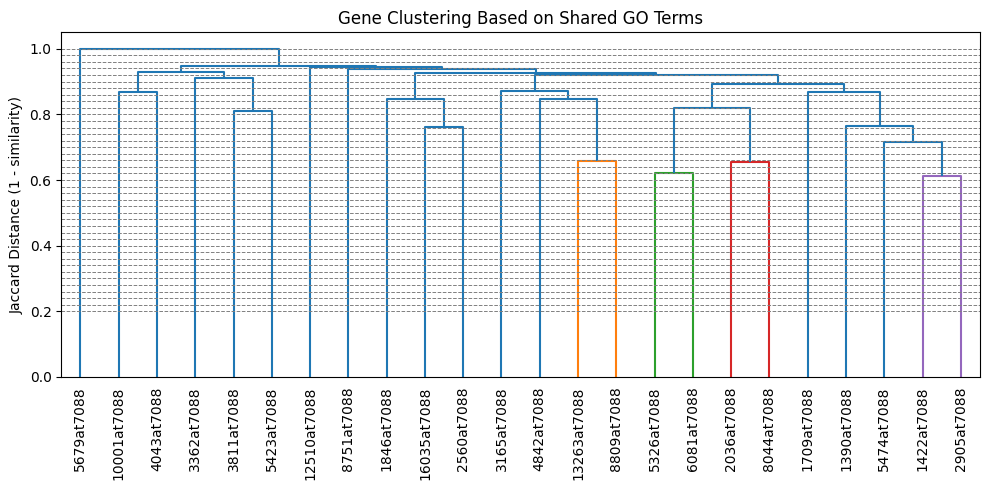

In [48]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform


go_dict = filtered_go_dict
# Step 2: Convert GO lists to sets
for gene in go_dict:
    go_dict[gene] = set(go.strip() for go in go_dict[gene])

genes = list(go_dict.keys())

# Step 3: Calculate Jaccard distance matrix
n = len(genes)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i < j:
            intersection = len(go_dict[genes[i]].intersection(go_dict[genes[j]]))
            union = len(go_dict[genes[i]].union(go_dict[genes[j]]))
            jaccard_dist = 1 - intersection / union if union > 0 else 1
            distance_matrix[i, j] = distance_matrix[j, i] = jaccard_dist

# Step 4: Hierarchical clustering
linkage_matrix = linkage(squareform(distance_matrix), method='average')  # or 'complete', 'ward'

# Step 5: Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=genes, leaf_rotation=90)
plt.title("Gene Clustering Based on Shared GO Terms")
plt.ylabel("Jaccard Distance (1 - similarity)")
for y in np.arange(0.2, 1.01, 0.02):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [54]:
from scipy.cluster.hierarchy import fcluster

cluster_labels = fcluster(linkage_matrix, t=0.75, criterion='distance')

cluster_to_genes = defaultdict(list)
for gene, label in zip(genes, cluster_labels):
    cluster_to_genes[label].append(gene)

# --- STEP 2: Count GO term occurrences per cluster ---
cluster_go_counts = {}
for cluster_id, gene_list in cluster_to_genes.items():
    all_go_terms = []
    for gene in gene_list:
        all_go_terms.extend(filtered_go_dict.get(gene, []))
    cluster_go_counts[cluster_id] = Counter(all_go_terms)

# --- STEP 3: Helper to filter redundant GO terms using GO hierarchy ---
def is_redundant(go_id, go_set):
    """Check if a parent of go_id is also in the set (i.e., go_id is redundant)."""
    term = go_dag.get(go_id)
    if term:
        return any(parent.id in go_set for parent in term.parents)
    return False

def get_non_redundant_terms(go_list):
    """Return GO terms that are not children of other terms in the list."""
    go_set = set(go_list)
    return {go_id for go_id in go_list if not is_redundant(go_id, go_set - {go_id})}

# --- STEP 4: Extract most relevant GO terms per cluster ---
cluster_term_dic = {}
output = ''
for cluster_id, counter in cluster_go_counts.items():
    top_terms = [go for go, _ in counter.most_common(50)]  # Top N frequent GO terms
    non_redundant = get_non_redundant_terms(top_terms)
    # Sort remaining by frequency and depth
    sorted_terms = sorted(
        [(go_id, go_dag[go_id].depth, counter[go_id])
         for go_id in non_redundant if go_id in go_dag],
        key=lambda x: (-x[2], -x[1])  # prioritize by count, then depth
    )

    print(f"\nCluster {cluster_id} — Most Relevant GO Terms:")
    output += f"\nCluster {cluster_id} — Most Relevant GO Terms:"
    cluster_term_dic[cluster_id] = [0, '']
    # if cluster_id not in cluster_term_dic:
        # cl
    for go_id, depth, count in sorted_terms[:10]:
        output += f"\n {go_id} ({go_dag[go_id].name}) — depth: {depth}, count: {count}"
        print(f"  {go_id} ({go_dag[go_id].name}) — depth: {depth}, count: {count}")
        if int(depth) >  cluster_term_dic[cluster_id][0]:
            cluster_term_dic[cluster_id] = [depth,go_dag[go_id].name]

# with open("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/15.Rho_gene_clusturing_using GO_terms/negative_rho_cluster_description.txt", 'w') as out_file:
#     out_file.write(output)



Cluster 1 — Most Relevant GO Terms:
  GO:0009166 (nucleotide catabolic process) — depth: 8, count: 1
  GO:0042542 (response to hydrogen peroxide) — depth: 5, count: 1
  GO:0009636 (response to toxic substance) — depth: 3, count: 1
  GO:0042493 (response to xenobiotic stimulus) — depth: 3, count: 1
  GO:0006950 (response to stress) — depth: 2, count: 1
  GO:0008150 (biological_process) — depth: 0, count: 1

Cluster 18 — Most Relevant GO Terms:
  GO:0060236 (regulation of mitotic spindle organization) — depth: 9, count: 1
  GO:0036257 (multivesicular body organization) — depth: 7, count: 1
  GO:0010824 (regulation of centrosome duplication) — depth: 7, count: 1
  GO:0009966 (regulation of signal transduction) — depth: 5, count: 1
  GO:0051310 (metaphase chromosome alignment) — depth: 5, count: 1
  GO:0051128 (regulation of cellular component organization) — depth: 4, count: 1
  GO:0032886 (regulation of microtubule-based process) — depth: 4, count: 1
  GO:0051726 (regulation of cell cyc

In [40]:
print(cluster_term_dic)

{1: [9, 'aspartate family amino acid metabolic process'], 11: [0, ''], 2: [10, 'regulation of mRNA stability'], 10: [7, 'negative regulation of chondrocyte differentiation'], 8: [5, 'regulation of signal transduction'], 12: [0, ''], 13: [0, ''], 14: [0, ''], 4: [8, 'regulation of telomere maintenance'], 5: [8, 'cell cycle checkpoint signaling'], 15: [0, ''], 6: [8, 'regulation of lymphocyte differentiation'], 7: [7, 'regulation of gene expression'], 16: [0, ''], 17: [0, ''], 18: [0, ''], 19: [0, ''], 20: [0, ''], 3: [0, ''], 21: [0, ''], 22: [0, ''], 9: [3, 'signaling'], 23: [0, '']}


In [57]:
output = "Cluster,Gene"
for key,value in cluster_to_genes.items():
    print(key)
    
    gene_names = []
    for gene in value:
        gene_names.append(gene_anno_dic[gene])
        print(gene,gene_anno_dic[gene], end = ",")
        # output += f",{gene_anno_dic[gene]}"
    output += f"\n{key},{';'.join(gene_names)}"


# with open("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/15.Rho_gene_clusturing_using GO_terms/negative_rho.csv", 'w') as out_file:
#     out_file.write(output)

1
10001at7088 NTHL1,18
12510at7088 CHMP1B,9
13263at7088 DSTN,8809at7088 ENAH,15
1390at7088 USP2,14
1422at7088 tim,2905at7088 per,5474at7088 CLOCK,6
16035at7088 ATP6V1G1,16
1709at7088 CSDE1,8
1846at7088 SLC6A19,13
2036at7088 LINS,8044at7088 Met,7
2560at7088 LETM1,11
3165at7088 TH,5
3362at7088 NOP14,3
3811at7088 LPCAT3,2
4043at7088 ACAT1,10
4842at7088 HDAC2,12
5326at7088 NPFFR2,6081at7088 Serpentine type 7TM GPCR chemoreceptor Srsx,4
5423at7088 QRSL1,19
5679at7088 Tudor domain,17
8751at7088 Chitin binding domain,

In [41]:
print(cluster_to_genes)

defaultdict(<class 'list'>, {1: ['10001at7088', '4043at7088'], 9: ['12510at7088'], 5: ['13263at7088', '3165at7088', '4842at7088', '8809at7088'], 7: ['1390at7088', '1422at7088', '1709at7088', '2905at7088', '5474at7088'], 4: ['16035at7088', '1846at7088', '2560at7088'], 6: ['2036at7088', '5326at7088', '6081at7088', '8044at7088'], 3: ['3362at7088'], 2: ['3811at7088', '5423at7088'], 10: ['5679at7088'], 8: ['8751at7088']})


In [44]:
from collections import defaultdict, Counter

# Example structure of cluster_labels: {'10001at7088': 0, '12510at7088': 1, ...}

cluster_go_terms = defaultdict(list)

for gene, cluster_id in cluster_labels.items():
    go_terms = filtered_go_dict.get(gene, [])
    cluster_go_terms[cluster_id].extend(go_terms)

# Now count GO terms per cluster
cluster_go_counts = {cid: Counter(go_list) for cid, go_list in cluster_go_terms.items()}

from goatools.obo_parser import GODag

go_dag = GODag(obo_file)  # Already downloaded earlier

# Get top N GO term names per cluster
for cluster_id, counter in cluster_go_counts.items():
    print(f"\nCluster {cluster_id} top GO terms:")
    for go_id, count in counter.most_common(5):  # Top 5 terms
        go_name = go_dag[go_id].name if go_id in go_dag else "Unknown"
        print(f"  {go_id} ({go_name}): {count}")



AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [45]:
cluster_labels

array([ 1,  9,  5,  7,  7,  4,  7,  4,  6,  4,  7,  5,  3,  2,  1,  5,  6,
        2,  7, 10,  6,  6,  8,  5], dtype=int32)

In [52]:
print(linkage_matrix)

[[ 4.         10.          0.55932203  2.        ]
 [16.         20.          0.60416667  2.        ]
 [ 8.         21.          0.60714286  2.        ]
 [ 2.         23.          0.67050691  2.        ]
 [18.         24.          0.73411426  3.        ]
 [13.         17.          0.75138122  2.        ]
 [ 3.         28.          0.75455912  4.        ]
 [ 0.         14.          0.77704918  2.        ]
 [ 5.          9.          0.77704918  2.        ]
 [ 6.         12.          0.79518072  2.        ]
 [26.         30.          0.81965178  6.        ]
 [29.         33.          0.83552405  4.        ]
 [ 7.         32.          0.8430532   3.        ]
 [31.         35.          0.84469304  6.        ]
 [11.         15.          0.84591195  2.        ]
 [27.         38.          0.85634537  4.        ]
 [25.         36.          0.87429672  5.        ]
 [34.         37.          0.89239971 12.        ]
 [39.         41.          0.9009709  16.        ]
 [ 1.         42.          0.90

In [58]:
cluster_labels = fcluster(linkage_matrix, t=0.85, criterion='distance')

# View result
print(cluster_labels)

[6 7 3 5 5 2 6 2 5 2 5 4 6 6 6 4 1 6 5 9 1 5 8 3]


In [66]:
output = "Cluster,Gene"
for key,value in cluster_to_genes.items():
    print(key)
    
    gene_names = []
    for gene in value:
        gene_names.append(gene_anno_dic[gene])
        # print(gene_anno_dic[gene])
        # output += f",{gene_anno_dic[gene]}"
    output += f"\n{key},{';'.join(gene_names)}"


with open("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/15.Rho_gene_clusturing_using GO_terms/positive_rho.csv", 'w') as out_file:
    out_file.write(output)
        
    

8
11
4
7
2
10
3
5
9
6
1
13
12


In [68]:
cluster_to_genes = defaultdict(list)
for gene, label in zip(genes, cluster_labels):
    cluster_to_genes[label].append(gene)

# --- STEP 2: Count GO term occurrences per cluster ---
cluster_go_counts = {}
for cluster_id, gene_list in cluster_to_genes.items():
    all_go_terms = []
    for gene in gene_list:
        all_go_terms.extend(filtered_go_dict.get(gene, []))
    cluster_go_counts[cluster_id] = Counter(all_go_terms)

# --- STEP 3: Helper to filter redundant GO terms using GO hierarchy ---
def is_redundant(go_id, go_set):
    """Check if a parent of go_id is also in the set (i.e., go_id is redundant)."""
    term = go_dag.get(go_id)
    if term:
        return any(parent.id in go_set for parent in term.parents)
    return False

def get_non_redundant_terms(go_list):
    """Return GO terms that are not children of other terms in the list."""
    go_set = set(go_list)
    return {go_id for go_id in go_list if not is_redundant(go_id, go_set - {go_id})}

# --- STEP 4: Extract most relevant GO terms per cluster ---
for cluster_id, counter in cluster_go_counts.items():
    top_terms = [go for go, _ in counter.most_common(50)]  # Top N frequent GO terms
    non_redundant = get_non_redundant_terms(top_terms)
    # Sort remaining by frequency and depth
    sorted_terms = sorted(
        [(go_id, go_dag[go_id].depth, counter[go_id])
         for go_id in non_redundant if go_id in go_dag],
        key=lambda x: (-x[2], -x[1])  # prioritize by count, then depth
    )

    print(f"\nCluster {cluster_id} — Most Relevant GO Terms:")
    for go_id, depth, count in sorted_terms[:10]:
        print(f"  {go_id} ({go_dag[go_id].name}) — depth: {depth}, count: {count}")


Cluster 8 — Most Relevant GO Terms:
  GO:0008150 (biological_process) — depth: 0, count: 2
  GO:0043412 (macromolecule modification) — depth: 4, count: 1

Cluster 11 — Most Relevant GO Terms:
  GO:0036257 (multivesicular body organization) — depth: 7, count: 1
  GO:1902115 (regulation of organelle assembly) — depth: 6, count: 1
  GO:1904896 (ESCRT complex disassembly) — depth: 6, count: 1
  GO:0000280 (nuclear division) — depth: 6, count: 1
  GO:0045184 (establishment of protein localization) — depth: 5, count: 1
  GO:0022411 (cellular component disassembly) — depth: 4, count: 1
  GO:0022607 (cellular component assembly) — depth: 4, count: 1
  GO:0048585 (negative regulation of response to stimulus) — depth: 4, count: 1
  GO:0043933 (protein-containing complex organization) — depth: 4, count: 1
  GO:0006996 (organelle organization) — depth: 4, count: 1

Cluster 4 — Most Relevant GO Terms:
  GO:0032956 (regulation of actin cytoskeleton organization) — depth: 7, count: 2
  GO:0031175 (n